<a href="https://colab.research.google.com/github/svfabi/EGRET/blob/main/Comparacao_Modificado_st((Hi_s(hi))%5EK)_%3D_st((1_n)%5EK).20-11-2024-23%3A19ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

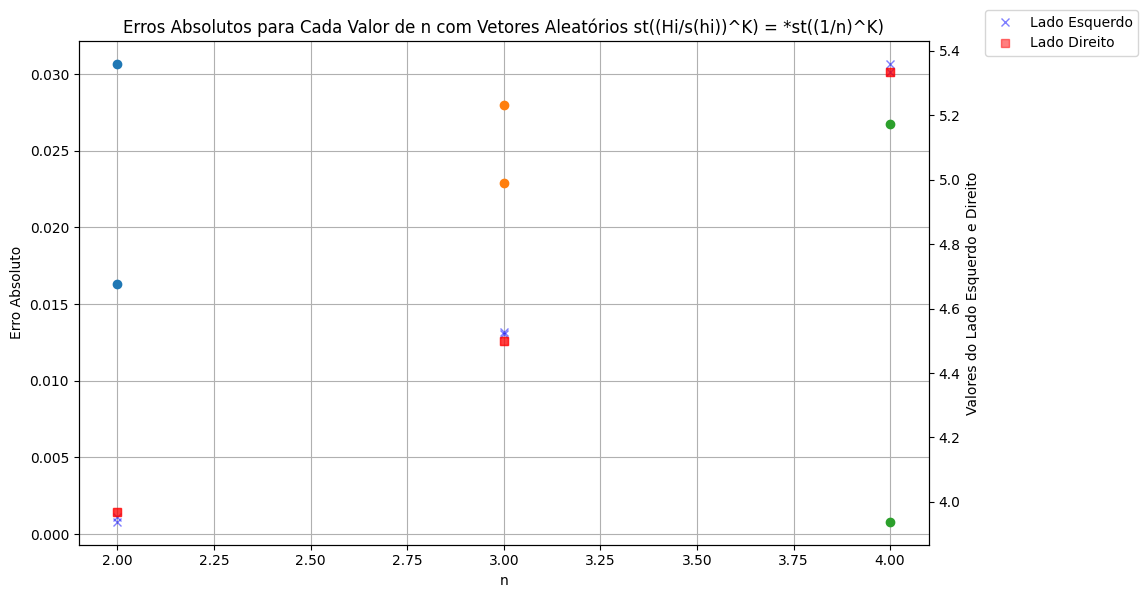

H_i        S_H        n     Hi/S_H     left_side       right_side      absolute_errors
18.9760    35.2926    2     0.5377     2.1107          1.9688          0.1420         
16.3166    35.2926    2     0.4623     1.8417          1.9688          0.1271         
Soma       35.2926    2                7.8905          7.9375          0.0470         
13.0436    48.8118    3     0.2672     1.3642          1.4979          0.1338         
19.5325    48.8118    3     0.4002     1.6603          1.4979          0.1623         
16.2356    48.8118    3     0.3326     1.4964          1.4979          0.0016         
Soma       48.8118    3                9.0467          8.9959          0.0508         
17.2846    67.7579    4     0.2551     1.3421          1.3330          0.0091         
19.9302    67.7579    4     0.2941     1.4158          1.3330          0.0828         
10.5682    67.7579    4     0.1560     1.1848          1.3330          0.1482         
19.9749    67.7579    4     0.2948     1.41

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Conferir este resultado para verificar sua autenticidade o valor real
# Função para calcular a soma da série de Taylor
def taylor_series_sum(x, k):
    return np.sum([x**i for i in range(k+1)])

# Define os parâmetros
K = 5  # Valor de exemplo para K
n_values = range(2, 5)  # Valores de n de 2 a 50
num_random_vectors = 2  # Número de vetores aleatórios a serem gerados para cada n

# Calcular e armazenar vetores aleatórios para cada n

random_vectors = {}
for n in n_values:
   random_vectors[n] = [np.random.uniform(10, 20, n) for _ in range(num_random_vectors)]

# Definir a função para calcular o erro absoluto
# Aqui  estou aproximando 1- Hi / s_H, K e 1- 1 / n
def calculate_absolute_error(H, K, n):
    s_H = np.sum(H)  # Soma dos valores de H
    left_side = taylor_series_sum(H / s_H, K)
    right_side = taylor_series_sum(1 / n, K) +n# Soma da série de Taylor
    return abs(left_side - right_side), left_side, right_side

# Calcular erros absolutos para cada n e cada vetor aleatório
absolute_errors = {n: [] for n in n_values}
left_sides = {n: [] for n in n_values}
right_sides = {n: [] for n in n_values}
for n in n_values:
    for vector in random_vectors[n]:
        abs_error, left_side, right_side = calculate_absolute_error(vector, K, n)
        absolute_errors[n].append(abs_error)
        left_sides[n].append(left_side)
        right_sides[n].append(right_side)

# Plotar os erros absolutos para cada n com vetores aleatórios
fig, ax1 = plt.subplots(figsize=(10, 6))

for n in n_values:
    ax1.plot([n] * num_random_vectors, absolute_errors[n], 'o')

ax1.set_xlabel('n')
ax1.set_ylabel('Erro Absoluto')
ax1.set_title('Erros Absolutos para Cada Valor de n com Vetores Aleatórios st((Hi/s(hi))^K) = *st((1/n)^K)')
ax1.grid(True)

# Criar um segundo eixo y para plotar os valores do lado esquerdo e direito
ax2 = ax1.twinx()
ax2.set_ylabel('Valores do Lado Esquerdo e Direito')
for n in n_values:
    ax2.plot([n] * num_random_vectors, left_sides[n], 'x', color='blue', alpha=0.5, label='Lado Esquerdo' if n == 2 else "")
    ax2.plot([n] * num_random_vectors, right_sides[n], 's', color='red', alpha=0.5, label='Lado Direito' if n == 2 else "")

# Adicionar legendas
fig.tight_layout()  # Ajustar layout para evitar sobreposição
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Ajustar posição da legenda
plt.show()


# Criar uma lista de dicionários, onde cada dicionário representa uma linha da tabela
data = []
for n in n_values:
    for i, Hi in enumerate(random_vectors[n][0]):
        s_H = np.sum(random_vectors[n][0])
        Hi_sHi = Hi / s_H
        left_side = taylor_series_sum(Hi / s_H, K)
        right_side = taylor_series_sum(1 / n, K)
        abs_error = abs(left_side - right_side)
        data.append({
            'H_i': Hi,
            'S_H': s_H,
            'n': n,
            'Hi/S_H': Hi_sHi,
            'left_side': left_side,
            'right_side': right_side,
            'absolute_errors': abs_error
        })

# Criar o DataFrame
df = pd.DataFrame(data)

# Gerar a tabela
print(f"{'H_i':<10} {'S_H':<10} {'n':<5} {'Hi/S_H':<10} {'left_side':<15} {'right_side':<15} {'absolute_errors':<15}")
for n in n_values:
    for i, Hi in enumerate(random_vectors[n][0]):
        s_H = np.sum(random_vectors[n][0])
        Hi_sHi = Hi / s_H
        left_side = taylor_series_sum(Hi / s_H, K)
        right_side = taylor_series_sum(1 / n, K)
        abs_error = abs(left_side - right_side)
        print(f"{Hi:<10.4f} {s_H:<10.4f} {n:<5} {Hi_sHi:<10.4f} {left_side:<15.4f} {right_side:<15.4f} {abs_error:<15.4f}")
    print(f"{'Soma':<10} {s_H:<10.4f} {n:<5} {'':<10} {np.sum(left_sides[n]):<15.4f} {np.sum(right_sides[n]):<15.4f} {np.sum(absolute_errors[n]):<15.4f}")

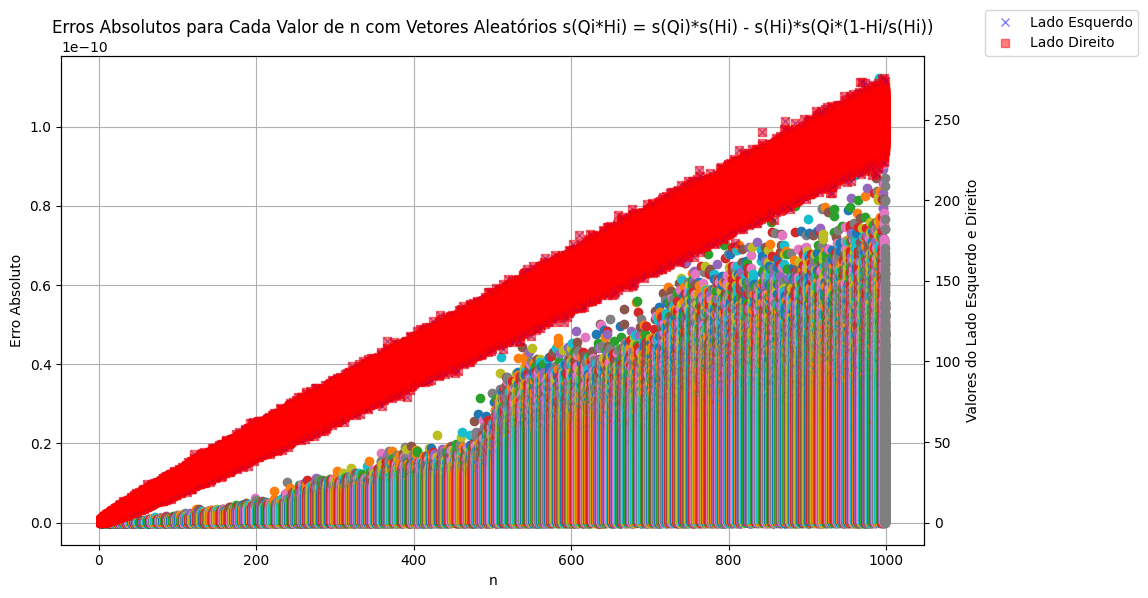

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Testa a Validade da Formula de Aproximação
# Define os parâmetros
n_values = range(2, 1000)  # Valores de n de 2 a 50
num_random_vectors = 1000  # Número de vetores aleatórios a serem gerados para cada n

# Calcular e armazenar vetores aleatórios para cada n
random_vectors = {}
for n in n_values:
   random_vectors[n] = [np.random.uniform(0, 130, n) for _ in range(num_random_vectors)]

# Função para calcular o erro absoluto
def calculate_absolute_error(Q, H, n):
    s_Q = np.sum(Q)  # Soma dos valores de Q
    s_H = np.sum(H)  # Soma dos valores de H
    left_side = np.sum(Q * H)
    right_side = s_Q * s_H - s_H * np.sum(Q * (1 - H / s_H))
    return abs(left_side - right_side), left_side, right_side

# Calcular erros absolutos para cada n e cada vetor aleatório
absolute_errors = {n: [] for n in n_values}
left_sides = {n: [] for n in n_values}
right_sides = {n: [] for n in n_values}
for n in n_values:
    for _ in range(num_random_vectors):
        Q = np.random.rand(n)
        H = np.random.rand(n)
        abs_error, left_side, right_side = calculate_absolute_error(Q, H, n)
        absolute_errors[n].append(abs_error)
        left_sides[n].append(left_side)
        right_sides[n].append(right_side)

# Plotar os erros absolutos para cada n com vetores aleatórios
fig, ax1 = plt.subplots(figsize=(10, 6))

for n in n_values:
    ax1.plot([n] * num_random_vectors, absolute_errors[n], 'o')

ax1.set_xlabel('n')
ax1.set_ylabel('Erro Absoluto')
ax1.set_title('Erros Absolutos para Cada Valor de n com Vetores Aleatórios s(Qi*Hi) = s(Qi)*s(Hi) - s(Hi)*s(Qi*(1-Hi/s(Hi))')
ax1.grid(True)

# Criar um segundo eixo y para plotar os valores do lado esquerdo e direito
ax2 = ax1.twinx()
ax2.set_ylabel('Valores do Lado Esquerdo e Direito')
for n in n_values:
    ax2.plot([n] * num_random_vectors, left_sides[n], 'x', color='blue', alpha=0.5, label='Lado Esquerdo' if n == 2 else "")
    ax2.plot([n] * num_random_vectors, right_sides[n], 's', color='red', alpha=0.5, label='Lado Direito' if n == 2 else "")

# Adicionar legendas
fig.tight_layout()  # Ajustar layout para evitar sobreposição
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Ajustar posição da legenda
plt.show()


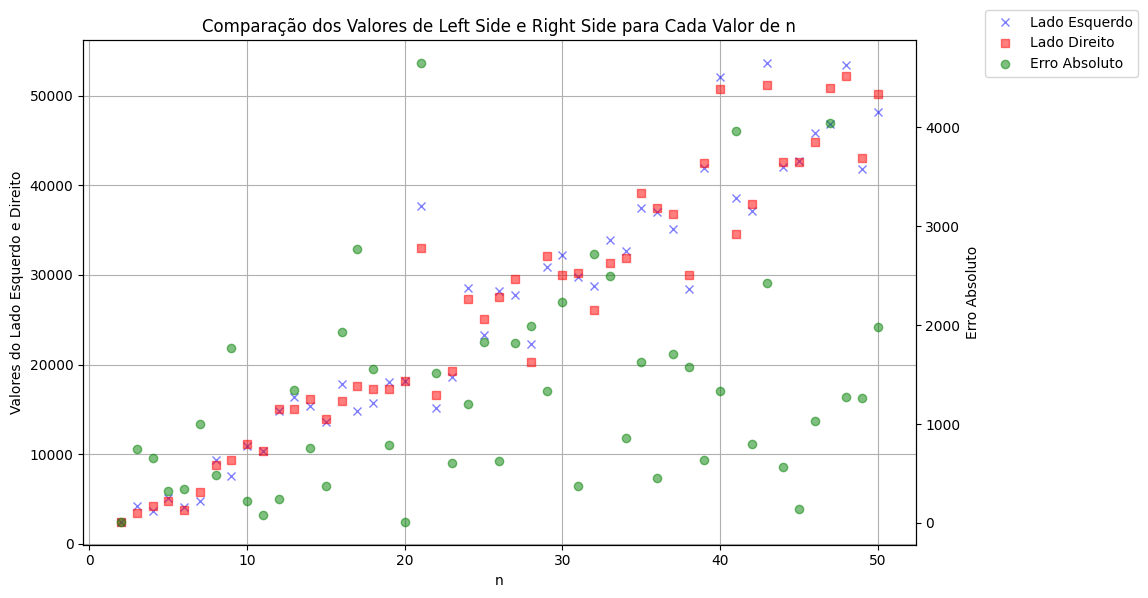

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a soma da série de Taylor
def taylor_series_sum(x, k):
    return np.sum([x**i for i in range(k+1)])

# Define os parâmetros
K = 4  # Valor de exemplo para K
n_values = range(2, 51)  # Valores de n de 2 a 50
num_random_vectors = 1  # Número de vetores aleatórios a serem gerados para cada n

# Calcular e armazenar vetores aleatórios para cada n
random_vectors = {}
for n in n_values:
    random_vectors[n] = [(np.random.uniform(0, 30, n), np.random.uniform(0, 130, n)) for _ in range(num_random_vectors)]

# Função para calcular os valores de left_side e right_side
def calculate_sides(Q, H, K, n):
    s_Q = np.sum(Q)  # Soma dos valores de Q
    s_H = np.sum(H)  # Soma dos valores de H
    left_side = np.sum(Q * H)
    right_side = s_Q * s_H- s_H * s_Q * (1 / (taylor_series_sum(1 / n, 10)))
    return left_side, right_side

# Calcular valores de left_side e right_side para cada n e cada vetor aleatório
left_sides = {n: [] for n in n_values}
right_sides = {n: [] for n in n_values}
absolute_errors = {n: [] for n in n_values}
for n in n_values:
    for Q, H in random_vectors[n]:
        left_side, right_side = calculate_sides(Q, H, K, n)
        left_sides[n].append(left_side)
        right_sides[n].append(right_side)
        absolute_errors[n].append(abs(left_side - right_side))

# Plotar os valores de left_side e right_side para cada n com vetores aleatórios
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('n')
ax1.set_ylabel('Valores do Lado Esquerdo e Direito')
ax1.set_title('Comparação dos Valores de Left Side e Right Side para Cada Valor de n')
ax1.grid(True)

for n in n_values:
    ax1.plot([n] * num_random_vectors, left_sides[n], 'x', color='blue', alpha=0.5, label='Lado Esquerdo' if n == 2 else "")
    ax1.plot([n] * num_random_vectors, right_sides[n], 's', color='red', alpha=0.5, label='Lado Direito' if n == 2 else "")

# Criar um segundo eixo y para plotar os valores do erro absoluto
ax2 = ax1.twinx()
ax2.set_ylabel('Erro Absoluto')
for n in n_values:
    ax2.plot([n] * num_random_vectors, absolute_errors[n], 'o', color='green', alpha=0.5, label='Erro Absoluto' if n == 2 else "")

# Adicionar legendas
fig.tight_layout()  # Ajustar layout para evitar sobreposição
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Ajustar posição da legenda
plt.show()
